In [174]:
import torch
from torch.autograd import Variable
from sklearn.datasets import load_iris
from keras.utils import to_categorical
import numpy as np

#batch size
batch_size=10

#loading iris data from sklearn
iris = load_iris()

x_data=iris.data
y_data=iris.target

#one hot encoding
y_data = to_categorical(y_data)

#numpy to pytorch variable
x_data = Variable(torch.from_numpy(x_data).double())
y_data = Variable(torch.from_numpy(y_data).double())


In [175]:

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 3)
        self.sigmoid=torch.nn.Sigmoid()
        self.relu=torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.5, inplace=False)
        self.softmax = torch.nn.Softmax()
    def forward(self,x):
        out1 = self.l1(x)
#        drop1 = self.dropout(out1)
        out2 = self.relu(self.l2(out1))
#        drop2 = self.dropout(out2)
        y_pred = self.softmax(self.l3(out2))
        return y_pred
        

net = Model().double()

#model summary
print(net)

#binary cross entropy loss
#loss_fun = torch.nn.BCELoss(size_average=True)
loss_fun = torch.nn.CrossEntropyLoss()

#SGD optimizer
import torch.optim as optim

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

permutation = torch.randperm(x_data.size()[0])


Model(
  (l1): Linear(in_features=4, out_features=6, bias=True)
  (l2): Linear(in_features=6, out_features=4, bias=True)
  (l3): Linear(in_features=4, out_features=3, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=None)
)


In [176]:
#training
learning = list()
partial = list()
for epoch in range(1000):
    print("Epoch: "+str(epoch))
    partial = list()
    for i in range(0, x_data.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        inputs, inputs_y = x_data[indices], y_data[indices]
        
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = criterion(outputs, inputs_y)
        partial.append(loss.data)
        print(epoch, loss.data)        
        loss.backward()
        optimizer.step()
        
    learning.append(np.mean(partial))

Epoch: 0
0 tensor(0.2386, dtype=torch.float64)
0 tensor(0.2299, dtype=torch.float64)
0 tensor(0.2222, dtype=torch.float64)
0 tensor(0.2101, dtype=torch.float64)
0 tensor(0.2444, dtype=torch.float64)
0 tensor(0.2427, dtype=torch.float64)
0 tensor(0.2370, dtype=torch.float64)
0 tensor(0.2241, dtype=torch.float64)
0 tensor(0.2223, dtype=torch.float64)
0 tensor(0.2076, dtype=torch.float64)
0 tensor(0.2502, dtype=torch.float64)
0 tensor(0.2305, dtype=torch.float64)
0 tensor(0.2110, dtype=torch.float64)
0 tensor(0.2280, dtype=torch.float64)
0 tensor(0.2337, dtype=torch.float64)
Epoch: 1
1 tensor(0.2384, dtype=torch.float64)
1 tensor(0.2298, dtype=torch.float64)
1 tensor(0.2220, dtype=torch.float64)
1 tensor(0.2099, dtype=torch.float64)
1 tensor(0.2442, dtype=torch.float64)
1 tensor(0.2424, dtype=torch.float64)
1 tensor(0.2368, dtype=torch.float64)
1 tensor(0.2241, dtype=torch.float64)
1 tensor(0.2223, dtype=torch.float64)
1 tensor(0.2076, dtype=torch.float64)
1 tensor(0.2499, dtype=torch.flo

/Users/raul.reguillo/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


14 tensor(0.2369, dtype=torch.float64)
14 tensor(0.2272, dtype=torch.float64)
14 tensor(0.2211, dtype=torch.float64)
14 tensor(0.2101, dtype=torch.float64)
14 tensor(0.2394, dtype=torch.float64)
14 tensor(0.2365, dtype=torch.float64)
14 tensor(0.2315, dtype=torch.float64)
14 tensor(0.2237, dtype=torch.float64)
14 tensor(0.2200, dtype=torch.float64)
14 tensor(0.2047, dtype=torch.float64)
14 tensor(0.2427, dtype=torch.float64)
14 tensor(0.2276, dtype=torch.float64)
14 tensor(0.2092, dtype=torch.float64)
14 tensor(0.2234, dtype=torch.float64)
14 tensor(0.2278, dtype=torch.float64)
Epoch: 15
15 tensor(0.2365, dtype=torch.float64)
15 tensor(0.2268, dtype=torch.float64)
15 tensor(0.2209, dtype=torch.float64)
15 tensor(0.2100, dtype=torch.float64)
15 tensor(0.2388, dtype=torch.float64)
15 tensor(0.2361, dtype=torch.float64)
15 tensor(0.2311, dtype=torch.float64)
15 tensor(0.2231, dtype=torch.float64)
15 tensor(0.2197, dtype=torch.float64)
15 tensor(0.2047, dtype=torch.float64)
15 tensor(0.242

30 tensor(0.2145, dtype=torch.float64)
30 tensor(0.2042, dtype=torch.float64)
30 tensor(0.2341, dtype=torch.float64)
30 tensor(0.2193, dtype=torch.float64)
30 tensor(0.2095, dtype=torch.float64)
30 tensor(0.2185, dtype=torch.float64)
30 tensor(0.2243, dtype=torch.float64)
Epoch: 31
31 tensor(0.2261, dtype=torch.float64)
31 tensor(0.2180, dtype=torch.float64)
31 tensor(0.2153, dtype=torch.float64)
31 tensor(0.2106, dtype=torch.float64)
31 tensor(0.2293, dtype=torch.float64)
31 tensor(0.2304, dtype=torch.float64)
31 tensor(0.2241, dtype=torch.float64)
31 tensor(0.2135, dtype=torch.float64)
31 tensor(0.2141, dtype=torch.float64)
31 tensor(0.2042, dtype=torch.float64)
31 tensor(0.2336, dtype=torch.float64)
31 tensor(0.2187, dtype=torch.float64)
31 tensor(0.2095, dtype=torch.float64)
31 tensor(0.2182, dtype=torch.float64)
31 tensor(0.2242, dtype=torch.float64)
Epoch: 32
32 tensor(0.2253, dtype=torch.float64)
32 tensor(0.2173, dtype=torch.float64)
32 tensor(0.2149, dtype=torch.float64)
32 te

44 tensor(0.2244, dtype=torch.float64)
44 tensor(0.2095, dtype=torch.float64)
44 tensor(0.2093, dtype=torch.float64)
44 tensor(0.2130, dtype=torch.float64)
44 tensor(0.2202, dtype=torch.float64)
Epoch: 45
45 tensor(0.2141, dtype=torch.float64)
45 tensor(0.2076, dtype=torch.float64)
45 tensor(0.2087, dtype=torch.float64)
45 tensor(0.2107, dtype=torch.float64)
45 tensor(0.2181, dtype=torch.float64)
45 tensor(0.2238, dtype=torch.float64)
45 tensor(0.2156, dtype=torch.float64)
45 tensor(0.2020, dtype=torch.float64)
45 tensor(0.2071, dtype=torch.float64)
45 tensor(0.2029, dtype=torch.float64)
45 tensor(0.2236, dtype=torch.float64)
45 tensor(0.2087, dtype=torch.float64)
45 tensor(0.2092, dtype=torch.float64)
45 tensor(0.2125, dtype=torch.float64)
45 tensor(0.2197, dtype=torch.float64)
Epoch: 46
46 tensor(0.2131, dtype=torch.float64)
46 tensor(0.2068, dtype=torch.float64)
46 tensor(0.2081, dtype=torch.float64)
46 tensor(0.2106, dtype=torch.float64)
46 tensor(0.2171, dtype=torch.float64)
46 te

59 tensor(0.2090, dtype=torch.float64)
59 tensor(0.2003, dtype=torch.float64)
59 tensor(0.2117, dtype=torch.float64)
59 tensor(0.2018, dtype=torch.float64)
59 tensor(0.1844, dtype=torch.float64)
59 tensor(0.1955, dtype=torch.float64)
59 tensor(0.1995, dtype=torch.float64)
59 tensor(0.2068, dtype=torch.float64)
59 tensor(0.1927, dtype=torch.float64)
59 tensor(0.2069, dtype=torch.float64)
59 tensor(0.2024, dtype=torch.float64)
59 tensor(0.2112, dtype=torch.float64)
Epoch: 60
60 tensor(0.1938, dtype=torch.float64)
60 tensor(0.1902, dtype=torch.float64)
60 tensor(0.1968, dtype=torch.float64)
60 tensor(0.2087, dtype=torch.float64)
60 tensor(0.1986, dtype=torch.float64)
60 tensor(0.2104, dtype=torch.float64)
60 tensor(0.2005, dtype=torch.float64)
60 tensor(0.1829, dtype=torch.float64)
60 tensor(0.1944, dtype=torch.float64)
60 tensor(0.1990, dtype=torch.float64)
60 tensor(0.2052, dtype=torch.float64)
60 tensor(0.1911, dtype=torch.float64)
60 tensor(0.2065, dtype=torch.float64)
60 tensor(0.201

73 tensor(0.1909, dtype=torch.float64)
73 tensor(0.1779, dtype=torch.float64)
73 tensor(0.1648, dtype=torch.float64)
73 tensor(0.1997, dtype=torch.float64)
73 tensor(0.1837, dtype=torch.float64)
73 tensor(0.1943, dtype=torch.float64)
Epoch: 74
74 tensor(0.1612, dtype=torch.float64)
74 tensor(0.1626, dtype=torch.float64)
74 tensor(0.1758, dtype=torch.float64)
74 tensor(0.2020, dtype=torch.float64)
74 tensor(0.1668, dtype=torch.float64)
74 tensor(0.1870, dtype=torch.float64)
74 tensor(0.1746, dtype=torch.float64)
74 tensor(0.1522, dtype=torch.float64)
74 tensor(0.1728, dtype=torch.float64)
74 tensor(0.1900, dtype=torch.float64)
74 tensor(0.1751, dtype=torch.float64)
74 tensor(0.1623, dtype=torch.float64)
74 tensor(0.1990, dtype=torch.float64)
74 tensor(0.1819, dtype=torch.float64)
74 tensor(0.1926, dtype=torch.float64)
Epoch: 75
75 tensor(0.1582, dtype=torch.float64)
75 tensor(0.1601, dtype=torch.float64)
75 tensor(0.1739, dtype=torch.float64)
75 tensor(0.2013, dtype=torch.float64)
75 te

95 tensor(0.1514, dtype=torch.float64)
Epoch: 96
96 tensor(0.0961, dtype=torch.float64)
96 tensor(0.1062, dtype=torch.float64)
96 tensor(0.1278, dtype=torch.float64)
96 tensor(0.1746, dtype=torch.float64)
96 tensor(0.1045, dtype=torch.float64)
96 tensor(0.1342, dtype=torch.float64)
96 tensor(0.1197, dtype=torch.float64)
96 tensor(0.0936, dtype=torch.float64)
96 tensor(0.1265, dtype=torch.float64)
96 tensor(0.1613, dtype=torch.float64)
96 tensor(0.1135, dtype=torch.float64)
96 tensor(0.1061, dtype=torch.float64)
96 tensor(0.1715, dtype=torch.float64)
96 tensor(0.1362, dtype=torch.float64)
96 tensor(0.1495, dtype=torch.float64)
Epoch: 97
97 tensor(0.0941, dtype=torch.float64)
97 tensor(0.1043, dtype=torch.float64)
97 tensor(0.1260, dtype=torch.float64)
97 tensor(0.1729, dtype=torch.float64)
97 tensor(0.1025, dtype=torch.float64)
97 tensor(0.1321, dtype=torch.float64)
97 tensor(0.1178, dtype=torch.float64)
97 tensor(0.0919, dtype=torch.float64)
97 tensor(0.1248, dtype=torch.float64)
97 te

113 tensor(0.1036, dtype=torch.float64)
113 tensor(0.1463, dtype=torch.float64)
113 tensor(0.0815, dtype=torch.float64)
113 tensor(0.1049, dtype=torch.float64)
113 tensor(0.0932, dtype=torch.float64)
113 tensor(0.0739, dtype=torch.float64)
113 tensor(0.1044, dtype=torch.float64)
113 tensor(0.1352, dtype=torch.float64)
113 tensor(0.0853, dtype=torch.float64)
113 tensor(0.0834, dtype=torch.float64)
113 tensor(0.1435, dtype=torch.float64)
113 tensor(0.1078, dtype=torch.float64)
113 tensor(0.1188, dtype=torch.float64)
Epoch: 114
114 tensor(0.0741, dtype=torch.float64)
114 tensor(0.0814, dtype=torch.float64)
114 tensor(0.1026, dtype=torch.float64)
114 tensor(0.1448, dtype=torch.float64)
114 tensor(0.0806, dtype=torch.float64)
114 tensor(0.1035, dtype=torch.float64)
114 tensor(0.0920, dtype=torch.float64)
114 tensor(0.0732, dtype=torch.float64)
114 tensor(0.1035, dtype=torch.float64)
114 tensor(0.1338, dtype=torch.float64)
114 tensor(0.0841, dtype=torch.float64)
114 tensor(0.0824, dtype=torc

136 tensor(0.0795, dtype=torch.float64)
136 tensor(0.0700, dtype=torch.float64)
136 tensor(0.0589, dtype=torch.float64)
136 tensor(0.0851, dtype=torch.float64)
136 tensor(0.1060, dtype=torch.float64)
136 tensor(0.0622, dtype=torch.float64)
136 tensor(0.0635, dtype=torch.float64)
136 tensor(0.1118, dtype=torch.float64)
136 tensor(0.0790, dtype=torch.float64)
136 tensor(0.0866, dtype=torch.float64)
Epoch: 137
137 tensor(0.0626, dtype=torch.float64)
137 tensor(0.0609, dtype=torch.float64)
137 tensor(0.0827, dtype=torch.float64)
137 tensor(0.1133, dtype=torch.float64)
137 tensor(0.0649, dtype=torch.float64)
137 tensor(0.0786, dtype=torch.float64)
137 tensor(0.0690, dtype=torch.float64)
137 tensor(0.0579, dtype=torch.float64)
137 tensor(0.0843, dtype=torch.float64)
137 tensor(0.1051, dtype=torch.float64)
137 tensor(0.0615, dtype=torch.float64)
137 tensor(0.0626, dtype=torch.float64)
137 tensor(0.1106, dtype=torch.float64)
137 tensor(0.0779, dtype=torch.float64)
137 tensor(0.0855, dtype=torc

150 tensor(0.0503, dtype=torch.float64)
150 tensor(0.0750, dtype=torch.float64)
150 tensor(0.0907, dtype=torch.float64)
150 tensor(0.0513, dtype=torch.float64)
150 tensor(0.0532, dtype=torch.float64)
150 tensor(0.0956, dtype=torch.float64)
150 tensor(0.0643, dtype=torch.float64)
150 tensor(0.0703, dtype=torch.float64)
Epoch: 151
151 tensor(0.0572, dtype=torch.float64)
151 tensor(0.0501, dtype=torch.float64)
151 tensor(0.0728, dtype=torch.float64)
151 tensor(0.0965, dtype=torch.float64)
151 tensor(0.0572, dtype=torch.float64)
151 tensor(0.0674, dtype=torch.float64)
151 tensor(0.0573, dtype=torch.float64)
151 tensor(0.0497, dtype=torch.float64)
151 tensor(0.0743, dtype=torch.float64)
151 tensor(0.0897, dtype=torch.float64)
151 tensor(0.0506, dtype=torch.float64)
151 tensor(0.0525, dtype=torch.float64)
151 tensor(0.0945, dtype=torch.float64)
151 tensor(0.0633, dtype=torch.float64)
151 tensor(0.0692, dtype=torch.float64)
Epoch: 152
152 tensor(0.0569, dtype=torch.float64)
152 tensor(0.0494,

164 tensor(0.0523, dtype=torch.float64)
164 tensor(0.0414, dtype=torch.float64)
164 tensor(0.0647, dtype=torch.float64)
164 tensor(0.0826, dtype=torch.float64)
164 tensor(0.0508, dtype=torch.float64)
164 tensor(0.0590, dtype=torch.float64)
164 tensor(0.0477, dtype=torch.float64)
164 tensor(0.0426, dtype=torch.float64)
164 tensor(0.0660, dtype=torch.float64)
164 tensor(0.0773, dtype=torch.float64)
164 tensor(0.0420, dtype=torch.float64)
164 tensor(0.0441, dtype=torch.float64)
164 tensor(0.0823, dtype=torch.float64)
164 tensor(0.0518, dtype=torch.float64)
164 tensor(0.0567, dtype=torch.float64)
Epoch: 165
165 tensor(0.0520, dtype=torch.float64)
165 tensor(0.0408, dtype=torch.float64)
165 tensor(0.0641, dtype=torch.float64)
165 tensor(0.0816, dtype=torch.float64)
165 tensor(0.0504, dtype=torch.float64)
165 tensor(0.0584, dtype=torch.float64)
165 tensor(0.0470, dtype=torch.float64)
165 tensor(0.0421, dtype=torch.float64)
165 tensor(0.0654, dtype=torch.float64)
165 tensor(0.0765, dtype=torc

177 tensor(0.0367, dtype=torch.float64)
177 tensor(0.0588, dtype=torch.float64)
177 tensor(0.0672, dtype=torch.float64)
177 tensor(0.0349, dtype=torch.float64)
177 tensor(0.0371, dtype=torch.float64)
177 tensor(0.0727, dtype=torch.float64)
177 tensor(0.0425, dtype=torch.float64)
177 tensor(0.0465, dtype=torch.float64)
Epoch: 178
178 tensor(0.0477, dtype=torch.float64)
178 tensor(0.0338, dtype=torch.float64)
178 tensor(0.0575, dtype=torch.float64)
178 tensor(0.0697, dtype=torch.float64)
178 tensor(0.0448, dtype=torch.float64)
178 tensor(0.0519, dtype=torch.float64)
178 tensor(0.0391, dtype=torch.float64)
178 tensor(0.0363, dtype=torch.float64)
178 tensor(0.0583, dtype=torch.float64)
178 tensor(0.0665, dtype=torch.float64)
178 tensor(0.0344, dtype=torch.float64)
178 tensor(0.0367, dtype=torch.float64)
178 tensor(0.0722, dtype=torch.float64)
178 tensor(0.0419, dtype=torch.float64)
178 tensor(0.0459, dtype=torch.float64)
Epoch: 179
179 tensor(0.0472, dtype=torch.float64)
179 tensor(0.0333,

191 tensor(0.0283, dtype=torch.float64)
191 tensor(0.0521, dtype=torch.float64)
191 tensor(0.0599, dtype=torch.float64)
191 tensor(0.0399, dtype=torch.float64)
191 tensor(0.0470, dtype=torch.float64)
191 tensor(0.0326, dtype=torch.float64)
191 tensor(0.0317, dtype=torch.float64)
191 tensor(0.0526, dtype=torch.float64)
191 tensor(0.0587, dtype=torch.float64)
191 tensor(0.0288, dtype=torch.float64)
191 tensor(0.0311, dtype=torch.float64)
191 tensor(0.0655, dtype=torch.float64)
191 tensor(0.0349, dtype=torch.float64)
191 tensor(0.0381, dtype=torch.float64)
Epoch: 192
192 tensor(0.0435, dtype=torch.float64)
192 tensor(0.0280, dtype=torch.float64)
192 tensor(0.0518, dtype=torch.float64)
192 tensor(0.0593, dtype=torch.float64)
192 tensor(0.0396, dtype=torch.float64)
192 tensor(0.0467, dtype=torch.float64)
192 tensor(0.0322, dtype=torch.float64)
192 tensor(0.0313, dtype=torch.float64)
192 tensor(0.0522, dtype=torch.float64)
192 tensor(0.0581, dtype=torch.float64)
192 tensor(0.0284, dtype=torc

204 tensor(0.0268, dtype=torch.float64)
204 tensor(0.0610, dtype=torch.float64)
204 tensor(0.0296, dtype=torch.float64)
204 tensor(0.0323, dtype=torch.float64)
Epoch: 205
205 tensor(0.0402, dtype=torch.float64)
205 tensor(0.0238, dtype=torch.float64)
205 tensor(0.0475, dtype=torch.float64)
205 tensor(0.0515, dtype=torch.float64)
205 tensor(0.0355, dtype=torch.float64)
205 tensor(0.0432, dtype=torch.float64)
205 tensor(0.0272, dtype=torch.float64)
205 tensor(0.0281, dtype=torch.float64)
205 tensor(0.0477, dtype=torch.float64)
205 tensor(0.0520, dtype=torch.float64)
205 tensor(0.0241, dtype=torch.float64)
205 tensor(0.0265, dtype=torch.float64)
205 tensor(0.0607, dtype=torch.float64)
205 tensor(0.0292, dtype=torch.float64)
205 tensor(0.0318, dtype=torch.float64)
Epoch: 206
206 tensor(0.0401, dtype=torch.float64)
206 tensor(0.0236, dtype=torch.float64)
206 tensor(0.0473, dtype=torch.float64)
206 tensor(0.0509, dtype=torch.float64)
206 tensor(0.0353, dtype=torch.float64)
206 tensor(0.0430,

218 tensor(0.0443, dtype=torch.float64)
218 tensor(0.0452, dtype=torch.float64)
218 tensor(0.0321, dtype=torch.float64)
218 tensor(0.0407, dtype=torch.float64)
218 tensor(0.0232, dtype=torch.float64)
218 tensor(0.0256, dtype=torch.float64)
218 tensor(0.0442, dtype=torch.float64)
218 tensor(0.0474, dtype=torch.float64)
218 tensor(0.0208, dtype=torch.float64)
218 tensor(0.0230, dtype=torch.float64)
218 tensor(0.0579, dtype=torch.float64)
218 tensor(0.0254, dtype=torch.float64)
218 tensor(0.0273, dtype=torch.float64)
Epoch: 219
219 tensor(0.0374, dtype=torch.float64)
219 tensor(0.0206, dtype=torch.float64)
219 tensor(0.0440, dtype=torch.float64)
219 tensor(0.0448, dtype=torch.float64)
219 tensor(0.0319, dtype=torch.float64)
219 tensor(0.0405, dtype=torch.float64)
219 tensor(0.0230, dtype=torch.float64)
219 tensor(0.0254, dtype=torch.float64)
219 tensor(0.0440, dtype=torch.float64)
219 tensor(0.0471, dtype=torch.float64)
219 tensor(0.0206, dtype=torch.float64)
219 tensor(0.0228, dtype=torc

231 tensor(0.0438, dtype=torch.float64)
231 tensor(0.0183, dtype=torch.float64)
231 tensor(0.0203, dtype=torch.float64)
231 tensor(0.0562, dtype=torch.float64)
231 tensor(0.0225, dtype=torch.float64)
231 tensor(0.0238, dtype=torch.float64)
Epoch: 232
232 tensor(0.0353, dtype=torch.float64)
232 tensor(0.0183, dtype=torch.float64)
232 tensor(0.0414, dtype=torch.float64)
232 tensor(0.0398, dtype=torch.float64)
232 tensor(0.0290, dtype=torch.float64)
232 tensor(0.0387, dtype=torch.float64)
232 tensor(0.0198, dtype=torch.float64)
232 tensor(0.0235, dtype=torch.float64)
232 tensor(0.0414, dtype=torch.float64)
232 tensor(0.0436, dtype=torch.float64)
232 tensor(0.0181, dtype=torch.float64)
232 tensor(0.0201, dtype=torch.float64)
232 tensor(0.0561, dtype=torch.float64)
232 tensor(0.0223, dtype=torch.float64)
232 tensor(0.0235, dtype=torch.float64)
Epoch: 233
233 tensor(0.0351, dtype=torch.float64)
233 tensor(0.0181, dtype=torch.float64)
233 tensor(0.0413, dtype=torch.float64)
233 tensor(0.0395,

248 tensor(0.0261, dtype=torch.float64)
248 tensor(0.0370, dtype=torch.float64)
248 tensor(0.0167, dtype=torch.float64)
248 tensor(0.0218, dtype=torch.float64)
248 tensor(0.0389, dtype=torch.float64)
248 tensor(0.0403, dtype=torch.float64)
248 tensor(0.0158, dtype=torch.float64)
248 tensor(0.0175, dtype=torch.float64)
248 tensor(0.0549, dtype=torch.float64)
248 tensor(0.0197, dtype=torch.float64)
248 tensor(0.0202, dtype=torch.float64)
Epoch: 249
249 tensor(0.0330, dtype=torch.float64)
249 tensor(0.0160, dtype=torch.float64)
249 tensor(0.0388, dtype=torch.float64)
249 tensor(0.0347, dtype=torch.float64)
249 tensor(0.0259, dtype=torch.float64)
249 tensor(0.0369, dtype=torch.float64)
249 tensor(0.0166, dtype=torch.float64)
249 tensor(0.0218, dtype=torch.float64)
249 tensor(0.0387, dtype=torch.float64)
249 tensor(0.0401, dtype=torch.float64)
249 tensor(0.0157, dtype=torch.float64)
249 tensor(0.0173, dtype=torch.float64)
249 tensor(0.0549, dtype=torch.float64)
249 tensor(0.0195, dtype=torc

270 tensor(0.0299, dtype=torch.float64)
270 tensor(0.0228, dtype=torch.float64)
270 tensor(0.0354, dtype=torch.float64)
270 tensor(0.0136, dtype=torch.float64)
270 tensor(0.0203, dtype=torch.float64)
270 tensor(0.0364, dtype=torch.float64)
270 tensor(0.0370, dtype=torch.float64)
270 tensor(0.0135, dtype=torch.float64)
270 tensor(0.0147, dtype=torch.float64)
270 tensor(0.0543, dtype=torch.float64)
270 tensor(0.0172, dtype=torch.float64)
270 tensor(0.0168, dtype=torch.float64)
Epoch: 271
271 tensor(0.0308, dtype=torch.float64)
271 tensor(0.0140, dtype=torch.float64)
271 tensor(0.0362, dtype=torch.float64)
271 tensor(0.0297, dtype=torch.float64)
271 tensor(0.0226, dtype=torch.float64)
271 tensor(0.0354, dtype=torch.float64)
271 tensor(0.0135, dtype=torch.float64)
271 tensor(0.0202, dtype=torch.float64)
271 tensor(0.0363, dtype=torch.float64)
271 tensor(0.0369, dtype=torch.float64)
271 tensor(0.0134, dtype=torch.float64)
271 tensor(0.0146, dtype=torch.float64)
271 tensor(0.0543, dtype=torc

284 tensor(0.0131, dtype=torch.float64)
284 tensor(0.0350, dtype=torch.float64)
284 tensor(0.0274, dtype=torch.float64)
284 tensor(0.0211, dtype=torch.float64)
284 tensor(0.0348, dtype=torch.float64)
284 tensor(0.0120, dtype=torch.float64)
284 tensor(0.0195, dtype=torch.float64)
284 tensor(0.0352, dtype=torch.float64)
284 tensor(0.0354, dtype=torch.float64)
284 tensor(0.0124, dtype=torch.float64)
284 tensor(0.0133, dtype=torch.float64)
284 tensor(0.0543, dtype=torch.float64)
284 tensor(0.0161, dtype=torch.float64)
284 tensor(0.0151, dtype=torch.float64)
Epoch: 285
285 tensor(0.0297, dtype=torch.float64)
285 tensor(0.0130, dtype=torch.float64)
285 tensor(0.0349, dtype=torch.float64)
285 tensor(0.0273, dtype=torch.float64)
285 tensor(0.0209, dtype=torch.float64)
285 tensor(0.0347, dtype=torch.float64)
285 tensor(0.0119, dtype=torch.float64)
285 tensor(0.0195, dtype=torch.float64)
285 tensor(0.0351, dtype=torch.float64)
285 tensor(0.0353, dtype=torch.float64)
285 tensor(0.0123, dtype=torc

300 tensor(0.0114, dtype=torch.float64)
300 tensor(0.0120, dtype=torch.float64)
300 tensor(0.0544, dtype=torch.float64)
300 tensor(0.0152, dtype=torch.float64)
300 tensor(0.0134, dtype=torch.float64)
Epoch: 301
301 tensor(0.0287, dtype=torch.float64)
301 tensor(0.0121, dtype=torch.float64)
301 tensor(0.0336, dtype=torch.float64)
301 tensor(0.0249, dtype=torch.float64)
301 tensor(0.0192, dtype=torch.float64)
301 tensor(0.0342, dtype=torch.float64)
301 tensor(0.0105, dtype=torch.float64)
301 tensor(0.0189, dtype=torch.float64)
301 tensor(0.0339, dtype=torch.float64)
301 tensor(0.0338, dtype=torch.float64)
301 tensor(0.0113, dtype=torch.float64)
301 tensor(0.0119, dtype=torch.float64)
301 tensor(0.0544, dtype=torch.float64)
301 tensor(0.0151, dtype=torch.float64)
301 tensor(0.0133, dtype=torch.float64)
Epoch: 302
302 tensor(0.0287, dtype=torch.float64)
302 tensor(0.0121, dtype=torch.float64)
302 tensor(0.0335, dtype=torch.float64)
302 tensor(0.0248, dtype=torch.float64)
302 tensor(0.0192,

323 tensor(0.0276, dtype=torch.float64)
323 tensor(0.0112, dtype=torch.float64)
323 tensor(0.0321, dtype=torch.float64)
323 tensor(0.0223, dtype=torch.float64)
323 tensor(0.0173, dtype=torch.float64)
323 tensor(0.0337, dtype=torch.float64)
323 tensor(0.0089, dtype=torch.float64)
323 tensor(0.0182, dtype=torch.float64)
323 tensor(0.0327, dtype=torch.float64)
323 tensor(0.0322, dtype=torch.float64)
323 tensor(0.0102, dtype=torch.float64)
323 tensor(0.0104, dtype=torch.float64)
323 tensor(0.0547, dtype=torch.float64)
323 tensor(0.0141, dtype=torch.float64)
323 tensor(0.0116, dtype=torch.float64)
Epoch: 324
324 tensor(0.0276, dtype=torch.float64)
324 tensor(0.0111, dtype=torch.float64)
324 tensor(0.0320, dtype=torch.float64)
324 tensor(0.0222, dtype=torch.float64)
324 tensor(0.0172, dtype=torch.float64)
324 tensor(0.0337, dtype=torch.float64)
324 tensor(0.0088, dtype=torch.float64)
324 tensor(0.0182, dtype=torch.float64)
324 tensor(0.0327, dtype=torch.float64)
324 tensor(0.0321, dtype=torc

336 tensor(0.0097, dtype=torch.float64)
336 tensor(0.0097, dtype=torch.float64)
336 tensor(0.0550, dtype=torch.float64)
336 tensor(0.0137, dtype=torch.float64)
336 tensor(0.0108, dtype=torch.float64)
Epoch: 337
337 tensor(0.0270, dtype=torch.float64)
337 tensor(0.0107, dtype=torch.float64)
337 tensor(0.0312, dtype=torch.float64)
337 tensor(0.0210, dtype=torch.float64)
337 tensor(0.0162, dtype=torch.float64)
337 tensor(0.0335, dtype=torch.float64)
337 tensor(0.0081, dtype=torch.float64)
337 tensor(0.0179, dtype=torch.float64)
337 tensor(0.0321, dtype=torch.float64)
337 tensor(0.0314, dtype=torch.float64)
337 tensor(0.0097, dtype=torch.float64)
337 tensor(0.0096, dtype=torch.float64)
337 tensor(0.0550, dtype=torch.float64)
337 tensor(0.0137, dtype=torch.float64)
337 tensor(0.0107, dtype=torch.float64)
Epoch: 338
338 tensor(0.0270, dtype=torch.float64)
338 tensor(0.0106, dtype=torch.float64)
338 tensor(0.0312, dtype=torch.float64)
338 tensor(0.0209, dtype=torch.float64)
338 tensor(0.0161,

350 tensor(0.0308, dtype=torch.float64)
350 tensor(0.0093, dtype=torch.float64)
350 tensor(0.0090, dtype=torch.float64)
350 tensor(0.0553, dtype=torch.float64)
350 tensor(0.0133, dtype=torch.float64)
350 tensor(0.0100, dtype=torch.float64)
Epoch: 351
351 tensor(0.0265, dtype=torch.float64)
351 tensor(0.0102, dtype=torch.float64)
351 tensor(0.0304, dtype=torch.float64)
351 tensor(0.0198, dtype=torch.float64)
351 tensor(0.0153, dtype=torch.float64)
351 tensor(0.0333, dtype=torch.float64)
351 tensor(0.0074, dtype=torch.float64)
351 tensor(0.0176, dtype=torch.float64)
351 tensor(0.0315, dtype=torch.float64)
351 tensor(0.0308, dtype=torch.float64)
351 tensor(0.0093, dtype=torch.float64)
351 tensor(0.0089, dtype=torch.float64)
351 tensor(0.0553, dtype=torch.float64)
351 tensor(0.0132, dtype=torch.float64)
351 tensor(0.0099, dtype=torch.float64)
Epoch: 352
352 tensor(0.0265, dtype=torch.float64)
352 tensor(0.0102, dtype=torch.float64)
352 tensor(0.0304, dtype=torch.float64)
352 tensor(0.0197,

364 tensor(0.0261, dtype=torch.float64)
364 tensor(0.0099, dtype=torch.float64)
364 tensor(0.0298, dtype=torch.float64)
364 tensor(0.0188, dtype=torch.float64)
364 tensor(0.0144, dtype=torch.float64)
364 tensor(0.0332, dtype=torch.float64)
364 tensor(0.0068, dtype=torch.float64)
364 tensor(0.0173, dtype=torch.float64)
364 tensor(0.0311, dtype=torch.float64)
364 tensor(0.0302, dtype=torch.float64)
364 tensor(0.0089, dtype=torch.float64)
364 tensor(0.0083, dtype=torch.float64)
364 tensor(0.0556, dtype=torch.float64)
364 tensor(0.0129, dtype=torch.float64)
364 tensor(0.0093, dtype=torch.float64)
Epoch: 365
365 tensor(0.0260, dtype=torch.float64)
365 tensor(0.0098, dtype=torch.float64)
365 tensor(0.0297, dtype=torch.float64)
365 tensor(0.0187, dtype=torch.float64)
365 tensor(0.0144, dtype=torch.float64)
365 tensor(0.0332, dtype=torch.float64)
365 tensor(0.0068, dtype=torch.float64)
365 tensor(0.0173, dtype=torch.float64)
365 tensor(0.0311, dtype=torch.float64)
365 tensor(0.0302, dtype=torc

384 tensor(0.0060, dtype=torch.float64)
384 tensor(0.0170, dtype=torch.float64)
384 tensor(0.0305, dtype=torch.float64)
384 tensor(0.0295, dtype=torch.float64)
384 tensor(0.0084, dtype=torch.float64)
384 tensor(0.0076, dtype=torch.float64)
384 tensor(0.0561, dtype=torch.float64)
384 tensor(0.0125, dtype=torch.float64)
384 tensor(0.0084, dtype=torch.float64)
Epoch: 385
385 tensor(0.0255, dtype=torch.float64)
385 tensor(0.0093, dtype=torch.float64)
385 tensor(0.0288, dtype=torch.float64)
385 tensor(0.0174, dtype=torch.float64)
385 tensor(0.0133, dtype=torch.float64)
385 tensor(0.0332, dtype=torch.float64)
385 tensor(0.0060, dtype=torch.float64)
385 tensor(0.0170, dtype=torch.float64)
385 tensor(0.0305, dtype=torch.float64)
385 tensor(0.0295, dtype=torch.float64)
385 tensor(0.0084, dtype=torch.float64)
385 tensor(0.0075, dtype=torch.float64)
385 tensor(0.0561, dtype=torch.float64)
385 tensor(0.0125, dtype=torch.float64)
385 tensor(0.0084, dtype=torch.float64)
Epoch: 386
386 tensor(0.0254,

402 tensor(0.0250, dtype=torch.float64)
402 tensor(0.0090, dtype=torch.float64)
402 tensor(0.0280, dtype=torch.float64)
402 tensor(0.0164, dtype=torch.float64)
402 tensor(0.0124, dtype=torch.float64)
402 tensor(0.0332, dtype=torch.float64)
402 tensor(0.0055, dtype=torch.float64)
402 tensor(0.0167, dtype=torch.float64)
402 tensor(0.0300, dtype=torch.float64)
402 tensor(0.0290, dtype=torch.float64)
402 tensor(0.0081, dtype=torch.float64)
402 tensor(0.0069, dtype=torch.float64)
402 tensor(0.0565, dtype=torch.float64)
402 tensor(0.0123, dtype=torch.float64)
402 tensor(0.0077, dtype=torch.float64)
Epoch: 403
403 tensor(0.0250, dtype=torch.float64)
403 tensor(0.0090, dtype=torch.float64)
403 tensor(0.0280, dtype=torch.float64)
403 tensor(0.0163, dtype=torch.float64)
403 tensor(0.0124, dtype=torch.float64)
403 tensor(0.0332, dtype=torch.float64)
403 tensor(0.0054, dtype=torch.float64)
403 tensor(0.0167, dtype=torch.float64)
403 tensor(0.0300, dtype=torch.float64)
403 tensor(0.0290, dtype=torc

416 tensor(0.0078, dtype=torch.float64)
416 tensor(0.0065, dtype=torch.float64)
416 tensor(0.0568, dtype=torch.float64)
416 tensor(0.0121, dtype=torch.float64)
416 tensor(0.0073, dtype=torch.float64)
Epoch: 417
417 tensor(0.0247, dtype=torch.float64)
417 tensor(0.0087, dtype=torch.float64)
417 tensor(0.0274, dtype=torch.float64)
417 tensor(0.0156, dtype=torch.float64)
417 tensor(0.0118, dtype=torch.float64)
417 tensor(0.0332, dtype=torch.float64)
417 tensor(0.0050, dtype=torch.float64)
417 tensor(0.0165, dtype=torch.float64)
417 tensor(0.0296, dtype=torch.float64)
417 tensor(0.0286, dtype=torch.float64)
417 tensor(0.0078, dtype=torch.float64)
417 tensor(0.0065, dtype=torch.float64)
417 tensor(0.0568, dtype=torch.float64)
417 tensor(0.0121, dtype=torch.float64)
417 tensor(0.0073, dtype=torch.float64)
Epoch: 418
418 tensor(0.0247, dtype=torch.float64)
418 tensor(0.0087, dtype=torch.float64)
418 tensor(0.0274, dtype=torch.float64)
418 tensor(0.0155, dtype=torch.float64)
418 tensor(0.0117,

439 tensor(0.0243, dtype=torch.float64)
439 tensor(0.0083, dtype=torch.float64)
439 tensor(0.0266, dtype=torch.float64)
439 tensor(0.0146, dtype=torch.float64)
439 tensor(0.0109, dtype=torch.float64)
439 tensor(0.0333, dtype=torch.float64)
439 tensor(0.0045, dtype=torch.float64)
439 tensor(0.0162, dtype=torch.float64)
439 tensor(0.0291, dtype=torch.float64)
439 tensor(0.0281, dtype=torch.float64)
439 tensor(0.0075, dtype=torch.float64)
439 tensor(0.0059, dtype=torch.float64)
439 tensor(0.0573, dtype=torch.float64)
439 tensor(0.0118, dtype=torch.float64)
439 tensor(0.0067, dtype=torch.float64)
Epoch: 440
440 tensor(0.0243, dtype=torch.float64)
440 tensor(0.0083, dtype=torch.float64)
440 tensor(0.0265, dtype=torch.float64)
440 tensor(0.0145, dtype=torch.float64)
440 tensor(0.0108, dtype=torch.float64)
440 tensor(0.0333, dtype=torch.float64)
440 tensor(0.0045, dtype=torch.float64)
440 tensor(0.0162, dtype=torch.float64)
440 tensor(0.0291, dtype=torch.float64)
440 tensor(0.0281, dtype=torc

456 tensor(0.0081, dtype=torch.float64)
456 tensor(0.0259, dtype=torch.float64)
456 tensor(0.0139, dtype=torch.float64)
456 tensor(0.0103, dtype=torch.float64)
456 tensor(0.0334, dtype=torch.float64)
456 tensor(0.0042, dtype=torch.float64)
456 tensor(0.0160, dtype=torch.float64)
456 tensor(0.0287, dtype=torch.float64)
456 tensor(0.0278, dtype=torch.float64)
456 tensor(0.0073, dtype=torch.float64)
456 tensor(0.0055, dtype=torch.float64)
456 tensor(0.0576, dtype=torch.float64)
456 tensor(0.0116, dtype=torch.float64)
456 tensor(0.0062, dtype=torch.float64)
Epoch: 457
457 tensor(0.0240, dtype=torch.float64)
457 tensor(0.0080, dtype=torch.float64)
457 tensor(0.0259, dtype=torch.float64)
457 tensor(0.0138, dtype=torch.float64)
457 tensor(0.0102, dtype=torch.float64)
457 tensor(0.0334, dtype=torch.float64)
457 tensor(0.0041, dtype=torch.float64)
457 tensor(0.0160, dtype=torch.float64)
457 tensor(0.0287, dtype=torch.float64)
457 tensor(0.0278, dtype=torch.float64)
457 tensor(0.0073, dtype=torc

470 tensor(0.0133, dtype=torch.float64)
470 tensor(0.0098, dtype=torch.float64)
470 tensor(0.0335, dtype=torch.float64)
470 tensor(0.0039, dtype=torch.float64)
470 tensor(0.0158, dtype=torch.float64)
470 tensor(0.0285, dtype=torch.float64)
470 tensor(0.0275, dtype=torch.float64)
470 tensor(0.0071, dtype=torch.float64)
470 tensor(0.0052, dtype=torch.float64)
470 tensor(0.0579, dtype=torch.float64)
470 tensor(0.0115, dtype=torch.float64)
470 tensor(0.0059, dtype=torch.float64)
Epoch: 471
471 tensor(0.0237, dtype=torch.float64)
471 tensor(0.0079, dtype=torch.float64)
471 tensor(0.0254, dtype=torch.float64)
471 tensor(0.0133, dtype=torch.float64)
471 tensor(0.0098, dtype=torch.float64)
471 tensor(0.0335, dtype=torch.float64)
471 tensor(0.0039, dtype=torch.float64)
471 tensor(0.0158, dtype=torch.float64)
471 tensor(0.0284, dtype=torch.float64)
471 tensor(0.0275, dtype=torch.float64)
471 tensor(0.0071, dtype=torch.float64)
471 tensor(0.0052, dtype=torch.float64)
471 tensor(0.0579, dtype=torc

484 tensor(0.0049, dtype=torch.float64)
484 tensor(0.0582, dtype=torch.float64)
484 tensor(0.0114, dtype=torch.float64)
484 tensor(0.0057, dtype=torch.float64)
Epoch: 485
485 tensor(0.0235, dtype=torch.float64)
485 tensor(0.0077, dtype=torch.float64)
485 tensor(0.0249, dtype=torch.float64)
485 tensor(0.0128, dtype=torch.float64)
485 tensor(0.0093, dtype=torch.float64)
485 tensor(0.0336, dtype=torch.float64)
485 tensor(0.0036, dtype=torch.float64)
485 tensor(0.0157, dtype=torch.float64)
485 tensor(0.0282, dtype=torch.float64)
485 tensor(0.0273, dtype=torch.float64)
485 tensor(0.0070, dtype=torch.float64)
485 tensor(0.0049, dtype=torch.float64)
485 tensor(0.0582, dtype=torch.float64)
485 tensor(0.0114, dtype=torch.float64)
485 tensor(0.0057, dtype=torch.float64)
Epoch: 486
486 tensor(0.0235, dtype=torch.float64)
486 tensor(0.0077, dtype=torch.float64)
486 tensor(0.0249, dtype=torch.float64)
486 tensor(0.0128, dtype=torch.float64)
486 tensor(0.0093, dtype=torch.float64)
486 tensor(0.0336,

507 tensor(0.0277, dtype=torch.float64)
507 tensor(0.0270, dtype=torch.float64)
507 tensor(0.0068, dtype=torch.float64)
507 tensor(0.0045, dtype=torch.float64)
507 tensor(0.0586, dtype=torch.float64)
507 tensor(0.0113, dtype=torch.float64)
507 tensor(0.0053, dtype=torch.float64)
Epoch: 508
508 tensor(0.0232, dtype=torch.float64)
508 tensor(0.0074, dtype=torch.float64)
508 tensor(0.0241, dtype=torch.float64)
508 tensor(0.0120, dtype=torch.float64)
508 tensor(0.0087, dtype=torch.float64)
508 tensor(0.0338, dtype=torch.float64)
508 tensor(0.0033, dtype=torch.float64)
508 tensor(0.0154, dtype=torch.float64)
508 tensor(0.0277, dtype=torch.float64)
508 tensor(0.0270, dtype=torch.float64)
508 tensor(0.0068, dtype=torch.float64)
508 tensor(0.0045, dtype=torch.float64)
508 tensor(0.0586, dtype=torch.float64)
508 tensor(0.0113, dtype=torch.float64)
508 tensor(0.0053, dtype=torch.float64)
Epoch: 509
509 tensor(0.0232, dtype=torch.float64)
509 tensor(0.0074, dtype=torch.float64)
509 tensor(0.0241,

522 tensor(0.0083, dtype=torch.float64)
522 tensor(0.0339, dtype=torch.float64)
522 tensor(0.0031, dtype=torch.float64)
522 tensor(0.0153, dtype=torch.float64)
522 tensor(0.0275, dtype=torch.float64)
522 tensor(0.0268, dtype=torch.float64)
522 tensor(0.0066, dtype=torch.float64)
522 tensor(0.0043, dtype=torch.float64)
522 tensor(0.0589, dtype=torch.float64)
522 tensor(0.0112, dtype=torch.float64)
522 tensor(0.0050, dtype=torch.float64)
Epoch: 523
523 tensor(0.0231, dtype=torch.float64)
523 tensor(0.0072, dtype=torch.float64)
523 tensor(0.0237, dtype=torch.float64)
523 tensor(0.0116, dtype=torch.float64)
523 tensor(0.0083, dtype=torch.float64)
523 tensor(0.0340, dtype=torch.float64)
523 tensor(0.0031, dtype=torch.float64)
523 tensor(0.0153, dtype=torch.float64)
523 tensor(0.0274, dtype=torch.float64)
523 tensor(0.0268, dtype=torch.float64)
523 tensor(0.0066, dtype=torch.float64)
523 tensor(0.0042, dtype=torch.float64)
523 tensor(0.0589, dtype=torch.float64)
523 tensor(0.0112, dtype=torc

536 tensor(0.0112, dtype=torch.float64)
536 tensor(0.0080, dtype=torch.float64)
536 tensor(0.0341, dtype=torch.float64)
536 tensor(0.0030, dtype=torch.float64)
536 tensor(0.0151, dtype=torch.float64)
536 tensor(0.0272, dtype=torch.float64)
536 tensor(0.0266, dtype=torch.float64)
536 tensor(0.0065, dtype=torch.float64)
536 tensor(0.0041, dtype=torch.float64)
536 tensor(0.0591, dtype=torch.float64)
536 tensor(0.0111, dtype=torch.float64)
536 tensor(0.0048, dtype=torch.float64)
Epoch: 537
537 tensor(0.0229, dtype=torch.float64)
537 tensor(0.0071, dtype=torch.float64)
537 tensor(0.0232, dtype=torch.float64)
537 tensor(0.0112, dtype=torch.float64)
537 tensor(0.0079, dtype=torch.float64)
537 tensor(0.0341, dtype=torch.float64)
537 tensor(0.0029, dtype=torch.float64)
537 tensor(0.0151, dtype=torch.float64)
537 tensor(0.0272, dtype=torch.float64)
537 tensor(0.0266, dtype=torch.float64)
537 tensor(0.0065, dtype=torch.float64)
537 tensor(0.0040, dtype=torch.float64)
537 tensor(0.0591, dtype=torc

550 tensor(0.0028, dtype=torch.float64)
550 tensor(0.0150, dtype=torch.float64)
550 tensor(0.0269, dtype=torch.float64)
550 tensor(0.0265, dtype=torch.float64)
550 tensor(0.0064, dtype=torch.float64)
550 tensor(0.0039, dtype=torch.float64)
550 tensor(0.0593, dtype=torch.float64)
550 tensor(0.0110, dtype=torch.float64)
550 tensor(0.0046, dtype=torch.float64)
Epoch: 551
551 tensor(0.0227, dtype=torch.float64)
551 tensor(0.0069, dtype=torch.float64)
551 tensor(0.0228, dtype=torch.float64)
551 tensor(0.0108, dtype=torch.float64)
551 tensor(0.0076, dtype=torch.float64)
551 tensor(0.0342, dtype=torch.float64)
551 tensor(0.0028, dtype=torch.float64)
551 tensor(0.0150, dtype=torch.float64)
551 tensor(0.0269, dtype=torch.float64)
551 tensor(0.0264, dtype=torch.float64)
551 tensor(0.0064, dtype=torch.float64)
551 tensor(0.0038, dtype=torch.float64)
551 tensor(0.0593, dtype=torch.float64)
551 tensor(0.0110, dtype=torch.float64)
551 tensor(0.0046, dtype=torch.float64)
Epoch: 552
552 tensor(0.0227,

564 tensor(0.0037, dtype=torch.float64)
564 tensor(0.0595, dtype=torch.float64)
564 tensor(0.0110, dtype=torch.float64)
564 tensor(0.0045, dtype=torch.float64)
Epoch: 565
565 tensor(0.0226, dtype=torch.float64)
565 tensor(0.0068, dtype=torch.float64)
565 tensor(0.0224, dtype=torch.float64)
565 tensor(0.0105, dtype=torch.float64)
565 tensor(0.0073, dtype=torch.float64)
565 tensor(0.0343, dtype=torch.float64)
565 tensor(0.0026, dtype=torch.float64)
565 tensor(0.0149, dtype=torch.float64)
565 tensor(0.0267, dtype=torch.float64)
565 tensor(0.0263, dtype=torch.float64)
565 tensor(0.0063, dtype=torch.float64)
565 tensor(0.0037, dtype=torch.float64)
565 tensor(0.0596, dtype=torch.float64)
565 tensor(0.0110, dtype=torch.float64)
565 tensor(0.0045, dtype=torch.float64)
Epoch: 566
566 tensor(0.0226, dtype=torch.float64)
566 tensor(0.0068, dtype=torch.float64)
566 tensor(0.0224, dtype=torch.float64)
566 tensor(0.0105, dtype=torch.float64)
566 tensor(0.0073, dtype=torch.float64)
566 tensor(0.0344,

578 tensor(0.0265, dtype=torch.float64)
578 tensor(0.0262, dtype=torch.float64)
578 tensor(0.0063, dtype=torch.float64)
578 tensor(0.0035, dtype=torch.float64)
578 tensor(0.0598, dtype=torch.float64)
578 tensor(0.0109, dtype=torch.float64)
578 tensor(0.0043, dtype=torch.float64)
Epoch: 579
579 tensor(0.0225, dtype=torch.float64)
579 tensor(0.0067, dtype=torch.float64)
579 tensor(0.0220, dtype=torch.float64)
579 tensor(0.0101, dtype=torch.float64)
579 tensor(0.0070, dtype=torch.float64)
579 tensor(0.0345, dtype=torch.float64)
579 tensor(0.0025, dtype=torch.float64)
579 tensor(0.0147, dtype=torch.float64)
579 tensor(0.0264, dtype=torch.float64)
579 tensor(0.0261, dtype=torch.float64)
579 tensor(0.0062, dtype=torch.float64)
579 tensor(0.0035, dtype=torch.float64)
579 tensor(0.0598, dtype=torch.float64)
579 tensor(0.0109, dtype=torch.float64)
579 tensor(0.0043, dtype=torch.float64)
Epoch: 580
580 tensor(0.0225, dtype=torch.float64)
580 tensor(0.0066, dtype=torch.float64)
580 tensor(0.0220,

592 tensor(0.0109, dtype=torch.float64)
592 tensor(0.0042, dtype=torch.float64)
Epoch: 593
593 tensor(0.0223, dtype=torch.float64)
593 tensor(0.0065, dtype=torch.float64)
593 tensor(0.0216, dtype=torch.float64)
593 tensor(0.0098, dtype=torch.float64)
593 tensor(0.0067, dtype=torch.float64)
593 tensor(0.0346, dtype=torch.float64)
593 tensor(0.0024, dtype=torch.float64)
593 tensor(0.0146, dtype=torch.float64)
593 tensor(0.0262, dtype=torch.float64)
593 tensor(0.0260, dtype=torch.float64)
593 tensor(0.0062, dtype=torch.float64)
593 tensor(0.0034, dtype=torch.float64)
593 tensor(0.0600, dtype=torch.float64)
593 tensor(0.0109, dtype=torch.float64)
593 tensor(0.0041, dtype=torch.float64)
Epoch: 594
594 tensor(0.0223, dtype=torch.float64)
594 tensor(0.0065, dtype=torch.float64)
594 tensor(0.0216, dtype=torch.float64)
594 tensor(0.0098, dtype=torch.float64)
594 tensor(0.0067, dtype=torch.float64)
594 tensor(0.0346, dtype=torch.float64)
594 tensor(0.0024, dtype=torch.float64)
594 tensor(0.0146,

607 tensor(0.0348, dtype=torch.float64)
607 tensor(0.0023, dtype=torch.float64)
607 tensor(0.0145, dtype=torch.float64)
607 tensor(0.0260, dtype=torch.float64)
607 tensor(0.0259, dtype=torch.float64)
607 tensor(0.0061, dtype=torch.float64)
607 tensor(0.0032, dtype=torch.float64)
607 tensor(0.0602, dtype=torch.float64)
607 tensor(0.0108, dtype=torch.float64)
607 tensor(0.0040, dtype=torch.float64)
Epoch: 608
608 tensor(0.0222, dtype=torch.float64)
608 tensor(0.0064, dtype=torch.float64)
608 tensor(0.0212, dtype=torch.float64)
608 tensor(0.0095, dtype=torch.float64)
608 tensor(0.0065, dtype=torch.float64)
608 tensor(0.0348, dtype=torch.float64)
608 tensor(0.0023, dtype=torch.float64)
608 tensor(0.0145, dtype=torch.float64)
608 tensor(0.0259, dtype=torch.float64)
608 tensor(0.0259, dtype=torch.float64)
608 tensor(0.0061, dtype=torch.float64)
608 tensor(0.0032, dtype=torch.float64)
608 tensor(0.0602, dtype=torch.float64)
608 tensor(0.0108, dtype=torch.float64)
608 tensor(0.0040, dtype=torc

621 tensor(0.0604, dtype=torch.float64)
621 tensor(0.0108, dtype=torch.float64)
621 tensor(0.0039, dtype=torch.float64)
Epoch: 622
622 tensor(0.0221, dtype=torch.float64)
622 tensor(0.0063, dtype=torch.float64)
622 tensor(0.0208, dtype=torch.float64)
622 tensor(0.0092, dtype=torch.float64)
622 tensor(0.0062, dtype=torch.float64)
622 tensor(0.0349, dtype=torch.float64)
622 tensor(0.0022, dtype=torch.float64)
622 tensor(0.0144, dtype=torch.float64)
622 tensor(0.0257, dtype=torch.float64)
622 tensor(0.0257, dtype=torch.float64)
622 tensor(0.0060, dtype=torch.float64)
622 tensor(0.0031, dtype=torch.float64)
622 tensor(0.0604, dtype=torch.float64)
622 tensor(0.0108, dtype=torch.float64)
622 tensor(0.0039, dtype=torch.float64)
Epoch: 623
623 tensor(0.0221, dtype=torch.float64)
623 tensor(0.0063, dtype=torch.float64)
623 tensor(0.0208, dtype=torch.float64)
623 tensor(0.0092, dtype=torch.float64)
623 tensor(0.0062, dtype=torch.float64)
623 tensor(0.0349, dtype=torch.float64)
623 tensor(0.0022,

636 tensor(0.0256, dtype=torch.float64)
636 tensor(0.0059, dtype=torch.float64)
636 tensor(0.0029, dtype=torch.float64)
636 tensor(0.0606, dtype=torch.float64)
636 tensor(0.0107, dtype=torch.float64)
636 tensor(0.0037, dtype=torch.float64)
Epoch: 637
637 tensor(0.0220, dtype=torch.float64)
637 tensor(0.0062, dtype=torch.float64)
637 tensor(0.0204, dtype=torch.float64)
637 tensor(0.0089, dtype=torch.float64)
637 tensor(0.0060, dtype=torch.float64)
637 tensor(0.0350, dtype=torch.float64)
637 tensor(0.0021, dtype=torch.float64)
637 tensor(0.0142, dtype=torch.float64)
637 tensor(0.0255, dtype=torch.float64)
637 tensor(0.0256, dtype=torch.float64)
637 tensor(0.0059, dtype=torch.float64)
637 tensor(0.0029, dtype=torch.float64)
637 tensor(0.0606, dtype=torch.float64)
637 tensor(0.0107, dtype=torch.float64)
637 tensor(0.0037, dtype=torch.float64)
Epoch: 638
638 tensor(0.0220, dtype=torch.float64)
638 tensor(0.0062, dtype=torch.float64)
638 tensor(0.0204, dtype=torch.float64)
638 tensor(0.0089,

650 tensor(0.0252, dtype=torch.float64)
650 tensor(0.0255, dtype=torch.float64)
650 tensor(0.0059, dtype=torch.float64)
650 tensor(0.0028, dtype=torch.float64)
650 tensor(0.0607, dtype=torch.float64)
650 tensor(0.0107, dtype=torch.float64)
650 tensor(0.0036, dtype=torch.float64)
Epoch: 651
651 tensor(0.0219, dtype=torch.float64)
651 tensor(0.0061, dtype=torch.float64)
651 tensor(0.0200, dtype=torch.float64)
651 tensor(0.0086, dtype=torch.float64)
651 tensor(0.0057, dtype=torch.float64)
651 tensor(0.0352, dtype=torch.float64)
651 tensor(0.0020, dtype=torch.float64)
651 tensor(0.0141, dtype=torch.float64)
651 tensor(0.0252, dtype=torch.float64)
651 tensor(0.0255, dtype=torch.float64)
651 tensor(0.0059, dtype=torch.float64)
651 tensor(0.0028, dtype=torch.float64)
651 tensor(0.0608, dtype=torch.float64)
651 tensor(0.0107, dtype=torch.float64)
651 tensor(0.0036, dtype=torch.float64)
Epoch: 652
652 tensor(0.0219, dtype=torch.float64)
652 tensor(0.0061, dtype=torch.float64)
652 tensor(0.0200,

664 tensor(0.0027, dtype=torch.float64)
664 tensor(0.0609, dtype=torch.float64)
664 tensor(0.0107, dtype=torch.float64)
664 tensor(0.0035, dtype=torch.float64)
Epoch: 665
665 tensor(0.0218, dtype=torch.float64)
665 tensor(0.0060, dtype=torch.float64)
665 tensor(0.0197, dtype=torch.float64)
665 tensor(0.0084, dtype=torch.float64)
665 tensor(0.0055, dtype=torch.float64)
665 tensor(0.0353, dtype=torch.float64)
665 tensor(0.0019, dtype=torch.float64)
665 tensor(0.0140, dtype=torch.float64)
665 tensor(0.0250, dtype=torch.float64)
665 tensor(0.0254, dtype=torch.float64)
665 tensor(0.0058, dtype=torch.float64)
665 tensor(0.0027, dtype=torch.float64)
665 tensor(0.0609, dtype=torch.float64)
665 tensor(0.0107, dtype=torch.float64)
665 tensor(0.0035, dtype=torch.float64)
Epoch: 666
666 tensor(0.0218, dtype=torch.float64)
666 tensor(0.0060, dtype=torch.float64)
666 tensor(0.0197, dtype=torch.float64)
666 tensor(0.0084, dtype=torch.float64)
666 tensor(0.0055, dtype=torch.float64)
666 tensor(0.0353,

679 tensor(0.0354, dtype=torch.float64)
679 tensor(0.0018, dtype=torch.float64)
679 tensor(0.0139, dtype=torch.float64)
679 tensor(0.0248, dtype=torch.float64)
679 tensor(0.0253, dtype=torch.float64)
679 tensor(0.0058, dtype=torch.float64)
679 tensor(0.0026, dtype=torch.float64)
679 tensor(0.0611, dtype=torch.float64)
679 tensor(0.0106, dtype=torch.float64)
679 tensor(0.0034, dtype=torch.float64)
Epoch: 680
680 tensor(0.0217, dtype=torch.float64)
680 tensor(0.0059, dtype=torch.float64)
680 tensor(0.0193, dtype=torch.float64)
680 tensor(0.0081, dtype=torch.float64)
680 tensor(0.0053, dtype=torch.float64)
680 tensor(0.0354, dtype=torch.float64)
680 tensor(0.0018, dtype=torch.float64)
680 tensor(0.0139, dtype=torch.float64)
680 tensor(0.0247, dtype=torch.float64)
680 tensor(0.0253, dtype=torch.float64)
680 tensor(0.0058, dtype=torch.float64)
680 tensor(0.0026, dtype=torch.float64)
680 tensor(0.0611, dtype=torch.float64)
680 tensor(0.0106, dtype=torch.float64)
680 tensor(0.0034, dtype=torc

694 tensor(0.0058, dtype=torch.float64)
694 tensor(0.0190, dtype=torch.float64)
694 tensor(0.0079, dtype=torch.float64)
694 tensor(0.0051, dtype=torch.float64)
694 tensor(0.0356, dtype=torch.float64)
694 tensor(0.0017, dtype=torch.float64)
694 tensor(0.0138, dtype=torch.float64)
694 tensor(0.0245, dtype=torch.float64)
694 tensor(0.0252, dtype=torch.float64)
694 tensor(0.0057, dtype=torch.float64)
694 tensor(0.0025, dtype=torch.float64)
694 tensor(0.0613, dtype=torch.float64)
694 tensor(0.0106, dtype=torch.float64)
694 tensor(0.0033, dtype=torch.float64)
Epoch: 695
695 tensor(0.0216, dtype=torch.float64)
695 tensor(0.0058, dtype=torch.float64)
695 tensor(0.0189, dtype=torch.float64)
695 tensor(0.0079, dtype=torch.float64)
695 tensor(0.0051, dtype=torch.float64)
695 tensor(0.0356, dtype=torch.float64)
695 tensor(0.0017, dtype=torch.float64)
695 tensor(0.0138, dtype=torch.float64)
695 tensor(0.0245, dtype=torch.float64)
695 tensor(0.0252, dtype=torch.float64)
695 tensor(0.0057, dtype=torc

708 tensor(0.0017, dtype=torch.float64)
708 tensor(0.0137, dtype=torch.float64)
708 tensor(0.0243, dtype=torch.float64)
708 tensor(0.0251, dtype=torch.float64)
708 tensor(0.0056, dtype=torch.float64)
708 tensor(0.0024, dtype=torch.float64)
708 tensor(0.0614, dtype=torch.float64)
708 tensor(0.0106, dtype=torch.float64)
708 tensor(0.0032, dtype=torch.float64)
Epoch: 709
709 tensor(0.0215, dtype=torch.float64)
709 tensor(0.0057, dtype=torch.float64)
709 tensor(0.0186, dtype=torch.float64)
709 tensor(0.0077, dtype=torch.float64)
709 tensor(0.0049, dtype=torch.float64)
709 tensor(0.0357, dtype=torch.float64)
709 tensor(0.0017, dtype=torch.float64)
709 tensor(0.0137, dtype=torch.float64)
709 tensor(0.0243, dtype=torch.float64)
709 tensor(0.0251, dtype=torch.float64)
709 tensor(0.0056, dtype=torch.float64)
709 tensor(0.0024, dtype=torch.float64)
709 tensor(0.0614, dtype=torch.float64)
709 tensor(0.0106, dtype=torch.float64)
709 tensor(0.0032, dtype=torch.float64)
Epoch: 710
710 tensor(0.0215,

722 tensor(0.0250, dtype=torch.float64)
722 tensor(0.0056, dtype=torch.float64)
722 tensor(0.0023, dtype=torch.float64)
722 tensor(0.0616, dtype=torch.float64)
722 tensor(0.0106, dtype=torch.float64)
722 tensor(0.0031, dtype=torch.float64)
Epoch: 723
723 tensor(0.0214, dtype=torch.float64)
723 tensor(0.0056, dtype=torch.float64)
723 tensor(0.0183, dtype=torch.float64)
723 tensor(0.0074, dtype=torch.float64)
723 tensor(0.0047, dtype=torch.float64)
723 tensor(0.0358, dtype=torch.float64)
723 tensor(0.0016, dtype=torch.float64)
723 tensor(0.0136, dtype=torch.float64)
723 tensor(0.0240, dtype=torch.float64)
723 tensor(0.0250, dtype=torch.float64)
723 tensor(0.0056, dtype=torch.float64)
723 tensor(0.0023, dtype=torch.float64)
723 tensor(0.0616, dtype=torch.float64)
723 tensor(0.0106, dtype=torch.float64)
723 tensor(0.0031, dtype=torch.float64)
Epoch: 724
724 tensor(0.0214, dtype=torch.float64)
724 tensor(0.0056, dtype=torch.float64)
724 tensor(0.0182, dtype=torch.float64)
724 tensor(0.0074,

737 tensor(0.0072, dtype=torch.float64)
737 tensor(0.0046, dtype=torch.float64)
737 tensor(0.0359, dtype=torch.float64)
737 tensor(0.0015, dtype=torch.float64)
737 tensor(0.0135, dtype=torch.float64)
737 tensor(0.0238, dtype=torch.float64)
737 tensor(0.0249, dtype=torch.float64)
737 tensor(0.0055, dtype=torch.float64)
737 tensor(0.0022, dtype=torch.float64)
737 tensor(0.0618, dtype=torch.float64)
737 tensor(0.0106, dtype=torch.float64)
737 tensor(0.0030, dtype=torch.float64)
Epoch: 738
738 tensor(0.0213, dtype=torch.float64)
738 tensor(0.0055, dtype=torch.float64)
738 tensor(0.0179, dtype=torch.float64)
738 tensor(0.0072, dtype=torch.float64)
738 tensor(0.0046, dtype=torch.float64)
738 tensor(0.0360, dtype=torch.float64)
738 tensor(0.0015, dtype=torch.float64)
738 tensor(0.0135, dtype=torch.float64)
738 tensor(0.0238, dtype=torch.float64)
738 tensor(0.0249, dtype=torch.float64)
738 tensor(0.0055, dtype=torch.float64)
738 tensor(0.0022, dtype=torch.float64)
738 tensor(0.0618, dtype=torc

751 tensor(0.0105, dtype=torch.float64)
751 tensor(0.0030, dtype=torch.float64)
Epoch: 752
752 tensor(0.0212, dtype=torch.float64)
752 tensor(0.0054, dtype=torch.float64)
752 tensor(0.0176, dtype=torch.float64)
752 tensor(0.0070, dtype=torch.float64)
752 tensor(0.0044, dtype=torch.float64)
752 tensor(0.0361, dtype=torch.float64)
752 tensor(0.0015, dtype=torch.float64)
752 tensor(0.0134, dtype=torch.float64)
752 tensor(0.0236, dtype=torch.float64)
752 tensor(0.0248, dtype=torch.float64)
752 tensor(0.0055, dtype=torch.float64)
752 tensor(0.0021, dtype=torch.float64)
752 tensor(0.0619, dtype=torch.float64)
752 tensor(0.0105, dtype=torch.float64)
752 tensor(0.0030, dtype=torch.float64)
Epoch: 753
753 tensor(0.0212, dtype=torch.float64)
753 tensor(0.0054, dtype=torch.float64)
753 tensor(0.0176, dtype=torch.float64)
753 tensor(0.0070, dtype=torch.float64)
753 tensor(0.0044, dtype=torch.float64)
753 tensor(0.0361, dtype=torch.float64)
753 tensor(0.0015, dtype=torch.float64)
753 tensor(0.0133,

766 tensor(0.0362, dtype=torch.float64)
766 tensor(0.0014, dtype=torch.float64)
766 tensor(0.0133, dtype=torch.float64)
766 tensor(0.0233, dtype=torch.float64)
766 tensor(0.0247, dtype=torch.float64)
766 tensor(0.0054, dtype=torch.float64)
766 tensor(0.0021, dtype=torch.float64)
766 tensor(0.0621, dtype=torch.float64)
766 tensor(0.0105, dtype=torch.float64)
766 tensor(0.0029, dtype=torch.float64)
Epoch: 767
767 tensor(0.0212, dtype=torch.float64)
767 tensor(0.0053, dtype=torch.float64)
767 tensor(0.0172, dtype=torch.float64)
767 tensor(0.0068, dtype=torch.float64)
767 tensor(0.0042, dtype=torch.float64)
767 tensor(0.0362, dtype=torch.float64)
767 tensor(0.0014, dtype=torch.float64)
767 tensor(0.0132, dtype=torch.float64)
767 tensor(0.0233, dtype=torch.float64)
767 tensor(0.0247, dtype=torch.float64)
767 tensor(0.0054, dtype=torch.float64)
767 tensor(0.0020, dtype=torch.float64)
767 tensor(0.0621, dtype=torch.float64)
767 tensor(0.0105, dtype=torch.float64)
767 tensor(0.0029, dtype=torc

782 tensor(0.0041, dtype=torch.float64)
782 tensor(0.0363, dtype=torch.float64)
782 tensor(0.0014, dtype=torch.float64)
782 tensor(0.0131, dtype=torch.float64)
782 tensor(0.0231, dtype=torch.float64)
782 tensor(0.0246, dtype=torch.float64)
782 tensor(0.0054, dtype=torch.float64)
782 tensor(0.0020, dtype=torch.float64)
782 tensor(0.0622, dtype=torch.float64)
782 tensor(0.0105, dtype=torch.float64)
782 tensor(0.0028, dtype=torch.float64)
Epoch: 783
783 tensor(0.0211, dtype=torch.float64)
783 tensor(0.0052, dtype=torch.float64)
783 tensor(0.0169, dtype=torch.float64)
783 tensor(0.0066, dtype=torch.float64)
783 tensor(0.0041, dtype=torch.float64)
783 tensor(0.0363, dtype=torch.float64)
783 tensor(0.0014, dtype=torch.float64)
783 tensor(0.0131, dtype=torch.float64)
783 tensor(0.0230, dtype=torch.float64)
783 tensor(0.0246, dtype=torch.float64)
783 tensor(0.0054, dtype=torch.float64)
783 tensor(0.0020, dtype=torch.float64)
783 tensor(0.0622, dtype=torch.float64)
783 tensor(0.0105, dtype=torc

797 tensor(0.0052, dtype=torch.float64)
797 tensor(0.0166, dtype=torch.float64)
797 tensor(0.0064, dtype=torch.float64)
797 tensor(0.0039, dtype=torch.float64)
797 tensor(0.0364, dtype=torch.float64)
797 tensor(0.0013, dtype=torch.float64)
797 tensor(0.0130, dtype=torch.float64)
797 tensor(0.0228, dtype=torch.float64)
797 tensor(0.0245, dtype=torch.float64)
797 tensor(0.0054, dtype=torch.float64)
797 tensor(0.0019, dtype=torch.float64)
797 tensor(0.0624, dtype=torch.float64)
797 tensor(0.0105, dtype=torch.float64)
797 tensor(0.0027, dtype=torch.float64)
Epoch: 798
798 tensor(0.0210, dtype=torch.float64)
798 tensor(0.0052, dtype=torch.float64)
798 tensor(0.0166, dtype=torch.float64)
798 tensor(0.0064, dtype=torch.float64)
798 tensor(0.0039, dtype=torch.float64)
798 tensor(0.0364, dtype=torch.float64)
798 tensor(0.0013, dtype=torch.float64)
798 tensor(0.0130, dtype=torch.float64)
798 tensor(0.0228, dtype=torch.float64)
798 tensor(0.0245, dtype=torch.float64)
798 tensor(0.0054, dtype=torc

811 tensor(0.0038, dtype=torch.float64)
811 tensor(0.0365, dtype=torch.float64)
811 tensor(0.0013, dtype=torch.float64)
811 tensor(0.0129, dtype=torch.float64)
811 tensor(0.0226, dtype=torch.float64)
811 tensor(0.0244, dtype=torch.float64)
811 tensor(0.0053, dtype=torch.float64)
811 tensor(0.0018, dtype=torch.float64)
811 tensor(0.0625, dtype=torch.float64)
811 tensor(0.0105, dtype=torch.float64)
811 tensor(0.0027, dtype=torch.float64)
Epoch: 812
812 tensor(0.0209, dtype=torch.float64)
812 tensor(0.0051, dtype=torch.float64)
812 tensor(0.0163, dtype=torch.float64)
812 tensor(0.0063, dtype=torch.float64)
812 tensor(0.0038, dtype=torch.float64)
812 tensor(0.0365, dtype=torch.float64)
812 tensor(0.0013, dtype=torch.float64)
812 tensor(0.0129, dtype=torch.float64)
812 tensor(0.0226, dtype=torch.float64)
812 tensor(0.0244, dtype=torch.float64)
812 tensor(0.0053, dtype=torch.float64)
812 tensor(0.0018, dtype=torch.float64)
812 tensor(0.0625, dtype=torch.float64)
812 tensor(0.0105, dtype=torc

825 tensor(0.0037, dtype=torch.float64)
825 tensor(0.0366, dtype=torch.float64)
825 tensor(0.0012, dtype=torch.float64)
825 tensor(0.0129, dtype=torch.float64)
825 tensor(0.0224, dtype=torch.float64)
825 tensor(0.0243, dtype=torch.float64)
825 tensor(0.0053, dtype=torch.float64)
825 tensor(0.0018, dtype=torch.float64)
825 tensor(0.0626, dtype=torch.float64)
825 tensor(0.0105, dtype=torch.float64)
825 tensor(0.0026, dtype=torch.float64)
Epoch: 826
826 tensor(0.0209, dtype=torch.float64)
826 tensor(0.0050, dtype=torch.float64)
826 tensor(0.0160, dtype=torch.float64)
826 tensor(0.0061, dtype=torch.float64)
826 tensor(0.0037, dtype=torch.float64)
826 tensor(0.0366, dtype=torch.float64)
826 tensor(0.0012, dtype=torch.float64)
826 tensor(0.0128, dtype=torch.float64)
826 tensor(0.0224, dtype=torch.float64)
826 tensor(0.0243, dtype=torch.float64)
826 tensor(0.0053, dtype=torch.float64)
826 tensor(0.0018, dtype=torch.float64)
826 tensor(0.0626, dtype=torch.float64)
826 tensor(0.0105, dtype=torc

839 tensor(0.0157, dtype=torch.float64)
839 tensor(0.0059, dtype=torch.float64)
839 tensor(0.0035, dtype=torch.float64)
839 tensor(0.0367, dtype=torch.float64)
839 tensor(0.0012, dtype=torch.float64)
839 tensor(0.0128, dtype=torch.float64)
839 tensor(0.0222, dtype=torch.float64)
839 tensor(0.0242, dtype=torch.float64)
839 tensor(0.0052, dtype=torch.float64)
839 tensor(0.0017, dtype=torch.float64)
839 tensor(0.0627, dtype=torch.float64)
839 tensor(0.0104, dtype=torch.float64)
839 tensor(0.0026, dtype=torch.float64)
Epoch: 840
840 tensor(0.0208, dtype=torch.float64)
840 tensor(0.0050, dtype=torch.float64)
840 tensor(0.0157, dtype=torch.float64)
840 tensor(0.0059, dtype=torch.float64)
840 tensor(0.0035, dtype=torch.float64)
840 tensor(0.0367, dtype=torch.float64)
840 tensor(0.0012, dtype=torch.float64)
840 tensor(0.0128, dtype=torch.float64)
840 tensor(0.0221, dtype=torch.float64)
840 tensor(0.0242, dtype=torch.float64)
840 tensor(0.0052, dtype=torch.float64)
840 tensor(0.0017, dtype=torc

861 tensor(0.0369, dtype=torch.float64)
861 tensor(0.0011, dtype=torch.float64)
861 tensor(0.0126, dtype=torch.float64)
861 tensor(0.0218, dtype=torch.float64)
861 tensor(0.0241, dtype=torch.float64)
861 tensor(0.0052, dtype=torch.float64)
861 tensor(0.0016, dtype=torch.float64)
861 tensor(0.0629, dtype=torch.float64)
861 tensor(0.0104, dtype=torch.float64)
861 tensor(0.0025, dtype=torch.float64)
Epoch: 862
862 tensor(0.0207, dtype=torch.float64)
862 tensor(0.0049, dtype=torch.float64)
862 tensor(0.0152, dtype=torch.float64)
862 tensor(0.0057, dtype=torch.float64)
862 tensor(0.0034, dtype=torch.float64)
862 tensor(0.0369, dtype=torch.float64)
862 tensor(0.0011, dtype=torch.float64)
862 tensor(0.0126, dtype=torch.float64)
862 tensor(0.0218, dtype=torch.float64)
862 tensor(0.0241, dtype=torch.float64)
862 tensor(0.0052, dtype=torch.float64)
862 tensor(0.0016, dtype=torch.float64)
862 tensor(0.0629, dtype=torch.float64)
862 tensor(0.0104, dtype=torch.float64)
862 tensor(0.0025, dtype=torc

875 tensor(0.0631, dtype=torch.float64)
875 tensor(0.0104, dtype=torch.float64)
875 tensor(0.0024, dtype=torch.float64)
Epoch: 876
876 tensor(0.0206, dtype=torch.float64)
876 tensor(0.0048, dtype=torch.float64)
876 tensor(0.0150, dtype=torch.float64)
876 tensor(0.0055, dtype=torch.float64)
876 tensor(0.0032, dtype=torch.float64)
876 tensor(0.0370, dtype=torch.float64)
876 tensor(0.0011, dtype=torch.float64)
876 tensor(0.0125, dtype=torch.float64)
876 tensor(0.0216, dtype=torch.float64)
876 tensor(0.0240, dtype=torch.float64)
876 tensor(0.0051, dtype=torch.float64)
876 tensor(0.0016, dtype=torch.float64)
876 tensor(0.0631, dtype=torch.float64)
876 tensor(0.0104, dtype=torch.float64)
876 tensor(0.0024, dtype=torch.float64)
Epoch: 877
877 tensor(0.0206, dtype=torch.float64)
877 tensor(0.0048, dtype=torch.float64)
877 tensor(0.0149, dtype=torch.float64)
877 tensor(0.0055, dtype=torch.float64)
877 tensor(0.0032, dtype=torch.float64)
877 tensor(0.0370, dtype=torch.float64)
877 tensor(0.0011,

892 tensor(0.0051, dtype=torch.float64)
892 tensor(0.0015, dtype=torch.float64)
892 tensor(0.0632, dtype=torch.float64)
892 tensor(0.0104, dtype=torch.float64)
892 tensor(0.0024, dtype=torch.float64)
Epoch: 893
893 tensor(0.0205, dtype=torch.float64)
893 tensor(0.0047, dtype=torch.float64)
893 tensor(0.0146, dtype=torch.float64)
893 tensor(0.0054, dtype=torch.float64)
893 tensor(0.0031, dtype=torch.float64)
893 tensor(0.0371, dtype=torch.float64)
893 tensor(0.0010, dtype=torch.float64)
893 tensor(0.0124, dtype=torch.float64)
893 tensor(0.0213, dtype=torch.float64)
893 tensor(0.0239, dtype=torch.float64)
893 tensor(0.0051, dtype=torch.float64)
893 tensor(0.0015, dtype=torch.float64)
893 tensor(0.0632, dtype=torch.float64)
893 tensor(0.0104, dtype=torch.float64)
893 tensor(0.0024, dtype=torch.float64)
Epoch: 894
894 tensor(0.0205, dtype=torch.float64)
894 tensor(0.0047, dtype=torch.float64)
894 tensor(0.0146, dtype=torch.float64)
894 tensor(0.0054, dtype=torch.float64)
894 tensor(0.0031,

906 tensor(0.0144, dtype=torch.float64)
906 tensor(0.0052, dtype=torch.float64)
906 tensor(0.0030, dtype=torch.float64)
906 tensor(0.0371, dtype=torch.float64)
906 tensor(0.0010, dtype=torch.float64)
906 tensor(0.0124, dtype=torch.float64)
906 tensor(0.0211, dtype=torch.float64)
906 tensor(0.0238, dtype=torch.float64)
906 tensor(0.0051, dtype=torch.float64)
906 tensor(0.0015, dtype=torch.float64)
906 tensor(0.0633, dtype=torch.float64)
906 tensor(0.0104, dtype=torch.float64)
906 tensor(0.0023, dtype=torch.float64)
Epoch: 907
907 tensor(0.0205, dtype=torch.float64)
907 tensor(0.0047, dtype=torch.float64)
907 tensor(0.0144, dtype=torch.float64)
907 tensor(0.0052, dtype=torch.float64)
907 tensor(0.0030, dtype=torch.float64)
907 tensor(0.0372, dtype=torch.float64)
907 tensor(0.0010, dtype=torch.float64)
907 tensor(0.0123, dtype=torch.float64)
907 tensor(0.0211, dtype=torch.float64)
907 tensor(0.0238, dtype=torch.float64)
907 tensor(0.0051, dtype=torch.float64)
907 tensor(0.0015, dtype=torc

929 tensor(0.0122, dtype=torch.float64)
929 tensor(0.0207, dtype=torch.float64)
929 tensor(0.0237, dtype=torch.float64)
929 tensor(0.0050, dtype=torch.float64)
929 tensor(0.0014, dtype=torch.float64)
929 tensor(0.0635, dtype=torch.float64)
929 tensor(0.0104, dtype=torch.float64)
929 tensor(0.0023, dtype=torch.float64)
Epoch: 930
930 tensor(0.0204, dtype=torch.float64)
930 tensor(0.0046, dtype=torch.float64)
930 tensor(0.0139, dtype=torch.float64)
930 tensor(0.0050, dtype=torch.float64)
930 tensor(0.0029, dtype=torch.float64)
930 tensor(0.0373, dtype=torch.float64)
930 tensor(0.0010, dtype=torch.float64)
930 tensor(0.0122, dtype=torch.float64)
930 tensor(0.0207, dtype=torch.float64)
930 tensor(0.0237, dtype=torch.float64)
930 tensor(0.0050, dtype=torch.float64)
930 tensor(0.0014, dtype=torch.float64)
930 tensor(0.0635, dtype=torch.float64)
930 tensor(0.0104, dtype=torch.float64)
930 tensor(0.0023, dtype=torch.float64)
Epoch: 931
931 tensor(0.0204, dtype=torch.float64)
931 tensor(0.0046,

943 tensor(0.0137, dtype=torch.float64)
943 tensor(0.0049, dtype=torch.float64)
943 tensor(0.0028, dtype=torch.float64)
943 tensor(0.0374, dtype=torch.float64)
943 tensor(0.0009, dtype=torch.float64)
943 tensor(0.0121, dtype=torch.float64)
943 tensor(0.0205, dtype=torch.float64)
943 tensor(0.0236, dtype=torch.float64)
943 tensor(0.0050, dtype=torch.float64)
943 tensor(0.0014, dtype=torch.float64)
943 tensor(0.0636, dtype=torch.float64)
943 tensor(0.0104, dtype=torch.float64)
943 tensor(0.0022, dtype=torch.float64)
Epoch: 944
944 tensor(0.0203, dtype=torch.float64)
944 tensor(0.0045, dtype=torch.float64)
944 tensor(0.0137, dtype=torch.float64)
944 tensor(0.0049, dtype=torch.float64)
944 tensor(0.0028, dtype=torch.float64)
944 tensor(0.0374, dtype=torch.float64)
944 tensor(0.0009, dtype=torch.float64)
944 tensor(0.0121, dtype=torch.float64)
944 tensor(0.0205, dtype=torch.float64)
944 tensor(0.0236, dtype=torch.float64)
944 tensor(0.0050, dtype=torch.float64)
944 tensor(0.0014, dtype=torc

960 tensor(0.0134, dtype=torch.float64)
960 tensor(0.0048, dtype=torch.float64)
960 tensor(0.0027, dtype=torch.float64)
960 tensor(0.0374, dtype=torch.float64)
960 tensor(0.0009, dtype=torch.float64)
960 tensor(0.0120, dtype=torch.float64)
960 tensor(0.0203, dtype=torch.float64)
960 tensor(0.0235, dtype=torch.float64)
960 tensor(0.0050, dtype=torch.float64)
960 tensor(0.0013, dtype=torch.float64)
960 tensor(0.0637, dtype=torch.float64)
960 tensor(0.0104, dtype=torch.float64)
960 tensor(0.0022, dtype=torch.float64)
Epoch: 961
961 tensor(0.0203, dtype=torch.float64)
961 tensor(0.0044, dtype=torch.float64)
961 tensor(0.0134, dtype=torch.float64)
961 tensor(0.0048, dtype=torch.float64)
961 tensor(0.0027, dtype=torch.float64)
961 tensor(0.0374, dtype=torch.float64)
961 tensor(0.0009, dtype=torch.float64)
961 tensor(0.0120, dtype=torch.float64)
961 tensor(0.0202, dtype=torch.float64)
961 tensor(0.0235, dtype=torch.float64)
961 tensor(0.0050, dtype=torch.float64)
961 tensor(0.0013, dtype=torc

974 tensor(0.0235, dtype=torch.float64)
974 tensor(0.0049, dtype=torch.float64)
974 tensor(0.0013, dtype=torch.float64)
974 tensor(0.0638, dtype=torch.float64)
974 tensor(0.0104, dtype=torch.float64)
974 tensor(0.0021, dtype=torch.float64)
Epoch: 975
975 tensor(0.0202, dtype=torch.float64)
975 tensor(0.0044, dtype=torch.float64)
975 tensor(0.0131, dtype=torch.float64)
975 tensor(0.0046, dtype=torch.float64)
975 tensor(0.0026, dtype=torch.float64)
975 tensor(0.0375, dtype=torch.float64)
975 tensor(0.0009, dtype=torch.float64)
975 tensor(0.0120, dtype=torch.float64)
975 tensor(0.0200, dtype=torch.float64)
975 tensor(0.0235, dtype=torch.float64)
975 tensor(0.0049, dtype=torch.float64)
975 tensor(0.0013, dtype=torch.float64)
975 tensor(0.0639, dtype=torch.float64)
975 tensor(0.0104, dtype=torch.float64)
975 tensor(0.0021, dtype=torch.float64)
Epoch: 976
976 tensor(0.0202, dtype=torch.float64)
976 tensor(0.0044, dtype=torch.float64)
976 tensor(0.0131, dtype=torch.float64)
976 tensor(0.0046,

988 tensor(0.0129, dtype=torch.float64)
988 tensor(0.0045, dtype=torch.float64)
988 tensor(0.0025, dtype=torch.float64)
988 tensor(0.0376, dtype=torch.float64)
988 tensor(0.0009, dtype=torch.float64)
988 tensor(0.0119, dtype=torch.float64)
988 tensor(0.0198, dtype=torch.float64)
988 tensor(0.0234, dtype=torch.float64)
988 tensor(0.0049, dtype=torch.float64)
988 tensor(0.0012, dtype=torch.float64)
988 tensor(0.0639, dtype=torch.float64)
988 tensor(0.0104, dtype=torch.float64)
988 tensor(0.0021, dtype=torch.float64)
Epoch: 989
989 tensor(0.0201, dtype=torch.float64)
989 tensor(0.0043, dtype=torch.float64)
989 tensor(0.0129, dtype=torch.float64)
989 tensor(0.0045, dtype=torch.float64)
989 tensor(0.0025, dtype=torch.float64)
989 tensor(0.0376, dtype=torch.float64)
989 tensor(0.0009, dtype=torch.float64)
989 tensor(0.0119, dtype=torch.float64)
989 tensor(0.0198, dtype=torch.float64)
989 tensor(0.0234, dtype=torch.float64)
989 tensor(0.0049, dtype=torch.float64)
989 tensor(0.0012, dtype=torc

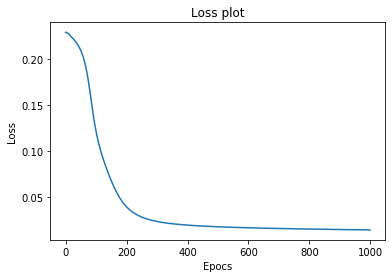

In [178]:
import matplotlib.pyplot as plt
plt.plot(range(len(learning)), learning)
plt.title("Loss plot")
plt.xlabel("Epocs")
plt.ylabel("Loss")
plt.show()